# Pokemon Classifier
A Convolutional Neural Network (CNN) designed to detect multiple Pokemon in a given image. The model is trained on a dataset containing various Pokemon characters and can identify multiple Pokemon in a single image.


In [5]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import tensorflow as tf
from keras.layers import Dropout, MaxPooling2D, Conv2D, BatchNormalization
from keras import datasets, layers, models
from PIL import Image
from sklearn.model_selection import train_test_split
import os
import random


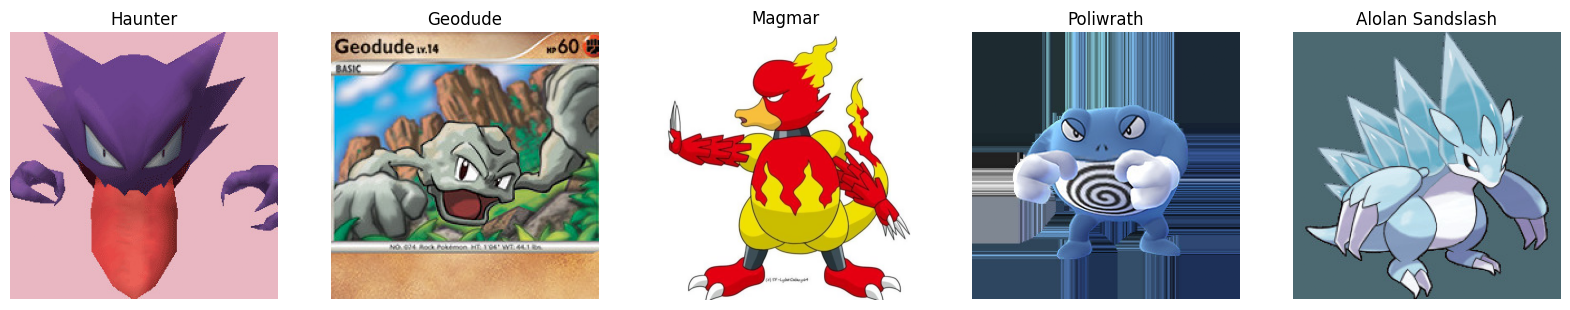

In [6]:
training_directory = 'data/training_set'
testing_directory = 'data/testing_set'


poke_list = os.listdir("data/images")
poke_dict = {string: index for index, string in enumerate(poke_list)}

fig, ax = plt.subplots(1, 5, figsize=(20, 20))
for i in range(5):
    random_pokemon = random.choice(os.listdir(training_directory))
    random_pokemon_image = random.choice(os.listdir(training_directory + '/' + random_pokemon))
    img = mpimg.imread(training_directory + '/' + random_pokemon + '/' + random_pokemon_image)
    ax[i].set_title(random_pokemon)
    ax[i].axis('off')
    ax[i].imshow(img)

In [12]:
# can speed up our compilation by pre-processing our images at once
def resize_image(image_path):
    with Image.open(image_path) as i:
        if i.mode != 'RGB':
            i = i.convert('RGB')
        i = i.resize((64, 64))
        return np.array(i)


#loop through creating dataset that contains [label, path_to_image]
dataset = []
for poke_folder in os.listdir(training_directory):
    for poke_img in os.listdir(training_directory + '/' + poke_folder):
        img = resize_image(training_directory + '/' + poke_folder + '/' + poke_img)
        dataset.append([poke_folder, img])

# place training data into x and labels into y
labels = np.array([poke_dict[x[0]] for x in dataset])
images = np.array([x[1] for x in dataset])

images = images / 255.0

# Flatten the image arrays for the MLP input
images = images.reshape(images.shape[0], -1)
# split data into training and testing
x_train, x_test, y_train, y_test = train_test_split(images, labels, test_size=0.20)

x_train = x_train.reshape(x_train.shape[0], 64, 64, 3)
x_test = x_test.reshape(x_test.shape[0], 64, 64, 3)





In [8]:



model = models.Sequential()
model.add(Conv2D(32, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(64, 64, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(Conv2D(128, (5, 5), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))

model.add(layers.Flatten())
model.add(layers.Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(512, activation='relu'))
model.add(Dropout(0.2))
model.add(layers.Dense(151, activation='softmax'))

model.summary()

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 32)        2432      
                                                                 
 max_pooling2d (MaxPooling2  (None, 32, 32, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 32, 32, 32)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        51264     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 64)        0         
 g2D)                                                            
                                                                 
 dropout_1 (Dropout)         (None, 16, 16, 64)        0

In [9]:

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(x_train, y_train, epochs=20, 
                    batch_size= 16,
                    validation_data=(x_test, y_test))

test_loss, test_acc = model.evaluate(x_test,  y_test, verbose=2)

print(test_acc)


Epoch 1/20


/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/keras/src/backend.py:5729: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a Softmax activation and thus does not represent logits. Was this intended?
  output, from_logits = _get_logits(


72/72 [==============================] - 13s 181ms/step - loss: 5.2296 - accuracy: 0.0044 - val_loss: 5.0213 - val_accuracy: 0.0000e+00
Epoch 2/20
72/72 [==============================] - 15s 205ms/step - loss: 5.0168 - accuracy: 0.0044 - val_loss: 5.0327 - val_accuracy: 0.0035
Epoch 3/20
72/72 [==============================] - 13s 188ms/step - loss: 5.0099 - accuracy: 0.0044 - val_loss: 5.0419 - val_accuracy: 0.0035
Epoch 4/20
72/72 [==============================] - 14s 194ms/step - loss: 4.9930 - accuracy: 0.0070 - val_loss: 5.0575 - val_accuracy: 0.0070
Epoch 5/20
72/72 [==============================] - 14s 191ms/step - loss: 4.9490 - accuracy: 0.0201 - val_loss: 5.1238 - val_accuracy: 0.0070
Epoch 6/20
72/72 [==============================] - 14s 197ms/step - loss: 4.8504 - accuracy: 0.0332 - val_loss: 5.1731 - val_accuracy: 0.0105
Epoch 7/20
72/72 [==============================] - 17s 244ms/step - loss: 4.6614 - accuracy: 0.0586 - val_loss: 5.2194 - val_accuracy: 0.0140
Epoch 

9/9 [==============================] - 0s 42ms/step


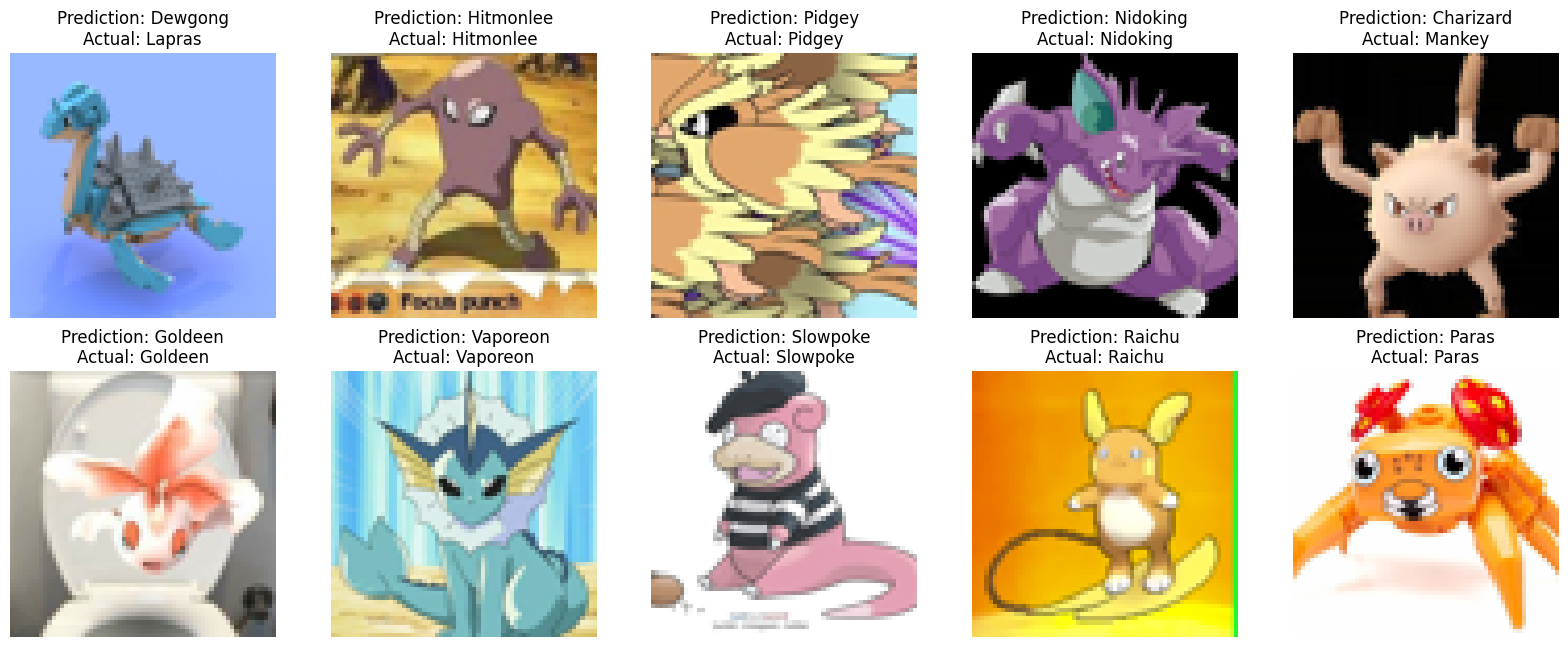

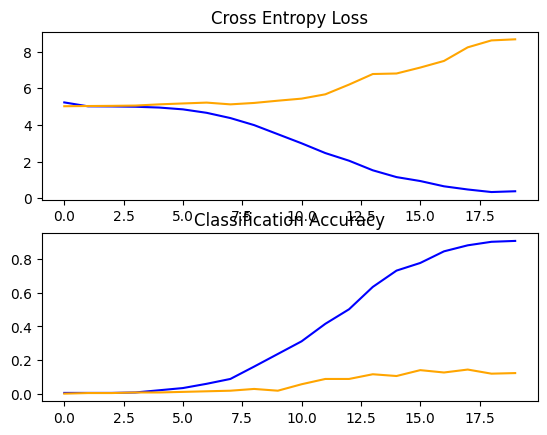

Accuracy for class: Zapdos       is 0.0 %
Accuracy for class: Kadabra      is 100.0 %
Accuracy for class: Alolan Sandslash is 100.0 %
Accuracy for class: Omanyte      is 100.0 %
Accuracy for class: Shellder     is 33.3 %
Accuracy for class: Bellsprout   is 0.0 %
Accuracy for class: Eevee        is 66.7 %
Accuracy for class: Jolteon      is 100.0 %
Accuracy for class: Hypno        is 100.0 %
Accuracy for class: Seel         is 100.0 %
Accuracy for class: Zubat        is 100.0 %
Accuracy for class: Graveler     is 50.0 %
Accuracy for class: Magneton     is 100.0 %
Accuracy for class: Abra         is 50.0 %
Accuracy for class: Kingler      is 66.7 %
Accuracy for class: Alakazam     is 0.0 %
Accuracy for class: Clefable     is 100.0 %
Accuracy for class: Gyarados     is 100.0 %
Accuracy for class: Poliwag      is 100.0 %
Accuracy for class: Rapidash     is 100.0 %
Accuracy for class: Machamp      is 80.0 %
Accuracy for class: Pinsir       is 0.0 %
Accuracy for class: Muk          is 0.0 %


In [14]:
import sys

def summarize_diagnostics(history):
    # plot loss
    plt.subplot(211)
    plt.title('Cross Entropy Loss')
    plt.plot(history.history['loss'], color='blue', label='train')
    plt.plot(history.history['val_loss'], color='orange', label='test')
    # plot accuracy
    plt.subplot(212)
    plt.title('Classification Accuracy')
    plt.plot(history.history['accuracy'], color='blue', label='train')
    plt.plot(history.history['val_accuracy'], color='orange', label='test')
    # save plot to file
    # filename = sys.argv[0].split('/')[-1]
    # plt.savefig(filename + '_plot.png')
    # plt.close()




# Prepare to count predictions for each class
correct_pred = {classname: 0 for classname in poke_list}
total_pred = {classname: 0 for classname in poke_list}

# Get model predictions on the test set
predictions = model.predict(x_test)
predicted_labels = tf.argmax(predictions, axis=1)

# Plot the  first 10 images in 2 rows test image and predicted label using Matplotlib, state the prediction vs actual name
plt.figure(figsize=(20, 20))
for i in range(10):
    ax = plt.subplot(5, 5, i + 1)

    plt.imshow(x_test[i], cmap=plt.cm.binary)    
    plt.title(f"Prediction: {poke_list[predicted_labels[i]]}\nActual: {poke_list[y_test[i]]}")
    
    plt.axis("off")

plt.show()

summarize_diagnostics(history)
plt.show()

# Collect the correct predictions for each class
for true_label, predicted_label in zip(y_test, predicted_labels):
    true_class = poke_list[true_label]
    if true_label == predicted_label:
        correct_pred[true_class] += 1
    total_pred[true_class] += 1

# Print accuracy for each class
for classname, correct_count in correct_pred.items():
    if total_pred[classname] != 0:
        accuracy = 100 * float(correct_count) / total_pred[classname]
    else:
        accuracy = 0
    print(f'Accuracy for class: {classname:12s} is {accuracy:.1f} %')

# Print overall accuracy
overall_accuracy = 100 * (sum(correct_pred.values()) / sum(total_pred.values()))
print(f'Overall accuracy is {overall_accuracy:.1f} %')

